# This is the notebook to preprocess the data.

In [39]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

from acse_9_irp_wafflescore import dataPreprocessing as dp
from scipy.ndimage import gaussian_filter
import numpy as np

import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The user can specify which data files/model to use here, the if/else statement were used for easier management.
For future usage, additional model name and input files can be added.

The input files in this stage were generated from Dr. Michele Paulatto, the script to generate those files are located in the Synthetic model folder in the Github repository.

In [40]:
# name of the model for easier reference
model = 'M1'
# the title of each column's variable
col_name = ['vp', 'vs', 'dn', 'vp/vs', 'qp', 'qs', 'x', 'z']


In [41]:
# load needed files
if(model == 'M1'):
    # Original Earth Model
    input_npz = np.load('../Synthetic Model/input_fields.npz')
    output_smooth_npz = np.load('../Synthetic Model/output_fields_smooth.npz')
    output_npz = np.load('../Synthetic Model/output_fields.npz')
elif(model == 'M5a'):
    # Simplified Earth Model
    input_npz = np.load('../Synthetic Model/Model5a/input_fields.npz')
    output_smooth_npz = np.load('../Synthetic Model/Model5a/output_fields_smooth.npz')
    output_npz = np.load('../Synthetic Model/Model5a/output_fields.npz')
elif(model == 'M5b'):
    # Simplified Earth Model -- less temperature anomaly
    input_npz = np.load('../Synthetic Model/Model5b/input_fields.npz')
    output_smooth_npz = np.load('../Synthetic Model/Model5b/output_fields_smooth.npz')
    output_npz = np.load('../Synthetic Model/Model5b/output_fields.npz')
else:
    # invalid model
    print('Invalid model', model)

In [49]:
# convert npz into 1d, 2d numpy
init_label = dp.convLabel(input_npz['classes'])
init_data = dp.convData(output_smooth_npz)

# remove water and perform data preprocessing
water_idx = np.where(init_label == 0)
label = np.delete(init_label, water_idx)
data = np.delete(init_data, water_idx, axis=0)

fdir = '../data/' + model + '_init_data.npy'
np.save(fdir, data)
logging.info('Initial Data as numpy saved at: %s' % fdir)

fdir = '../data/' + model + '_init_label.npy'
np.save(fdir, label)
logging.info('Initial label as numpy saved at: %s' % fdir)

data = dp.data_cleanup(data, col_name, re_inf=-9999)
logging.debug("Water removed shape: (%d, %d)" %
              (data.shape[0], data.shape[1]))

if (model):
    fdir = '../data/' + model + '_clean_data.npy'
    np.save(fdir, data)
    logging.info('Data saved at: %s' % fdir)

    fdir = '../data/' + model + '_data_label.npy'
    np.save(fdir, label)
    logging.info('Data label saved at: %s' % fdir)

    fdir = '../data/' + model + '_xz_pos.npy'
    np.save(fdir, data[:, -2:])
    logging.info('XZ positions saved at: %s' % fdir)

2019-08-28 01:16:22,380 | INFO : Initial Data as numpy saved at: ../data/M1_init_data.npy
2019-08-28 01:16:22,383 | INFO : Initial label as numpy saved at: ../data/M1_init_label.npy
2019-08-28 01:16:22,385 | INFO : Replacing INF with -9999
2019-08-28 01:16:22,394 | INFO : Data saved at: ../data/M1_clean_data.npy
2019-08-28 01:16:22,397 | INFO : Data label saved at: ../data/M1_data_label.npy
2019-08-28 01:16:22,402 | INFO : XZ positions saved at: ../data/M1_xz_pos.npy


In [5]:
means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)

In [51]:
titles_u = ['Class', 'Vp (m/s)', 'Vs (m/s)', 'Density (kg/m$^3$)', 'Vp/Vs', 'Qp', 'Qs', 'X', 'Z']
titles = ['Class', 'Vp', 'Vs', 'Density', 'VpVs', 'Qp', 'Qs', 'X', 'Z']

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

cdir = '../data/' + model + '_clean_data.npy'
data = np.load(cdir)

ddir = '../data/' + model + '_init_data.npy'
idata = np.load(ddir)

idir = '../data/' + model + '_init_label.npy'
ilabel = np.load(idir)

col_n = ['vp', 'vs', 'dn', 'vp/vs', 'qp', 'qs', 'x', 'z']


,vp,vs,dn,vp/vs,qp,qs,x,z,Class
count,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000
mean,5.401212,2.864795,2.679557,1.982743,5.505068,4.533249,11919.573236,5482.695989,6.478825
std,0.961089,0.659769,0.234086,0.712433,0.641800,0.671320,6887.639754,2585.487456,1.964271
min,2.062774,0.204156,1.526524,1.703044,3.827205,2.058073,0.000000,300.000000,1.000000
25%,5.032374,2.547932,2.595498,1.745731,4.942282,4.012134,5900.000000,3300.000000,6.000000
50%,5.651654,3.157871,2.768116,1.820990,5.695261,4.749162,12100.000000,5500.000000,7.000000
75%,6.064342,3.331161,2.792357,1.939927,6.035606,5.051795,17800.000000,7700.000000,8.000000
max,6.813369,3.565958,2.953319,10.000000,6.558678,6.277059,23900.000000,9900.000000,9.000000


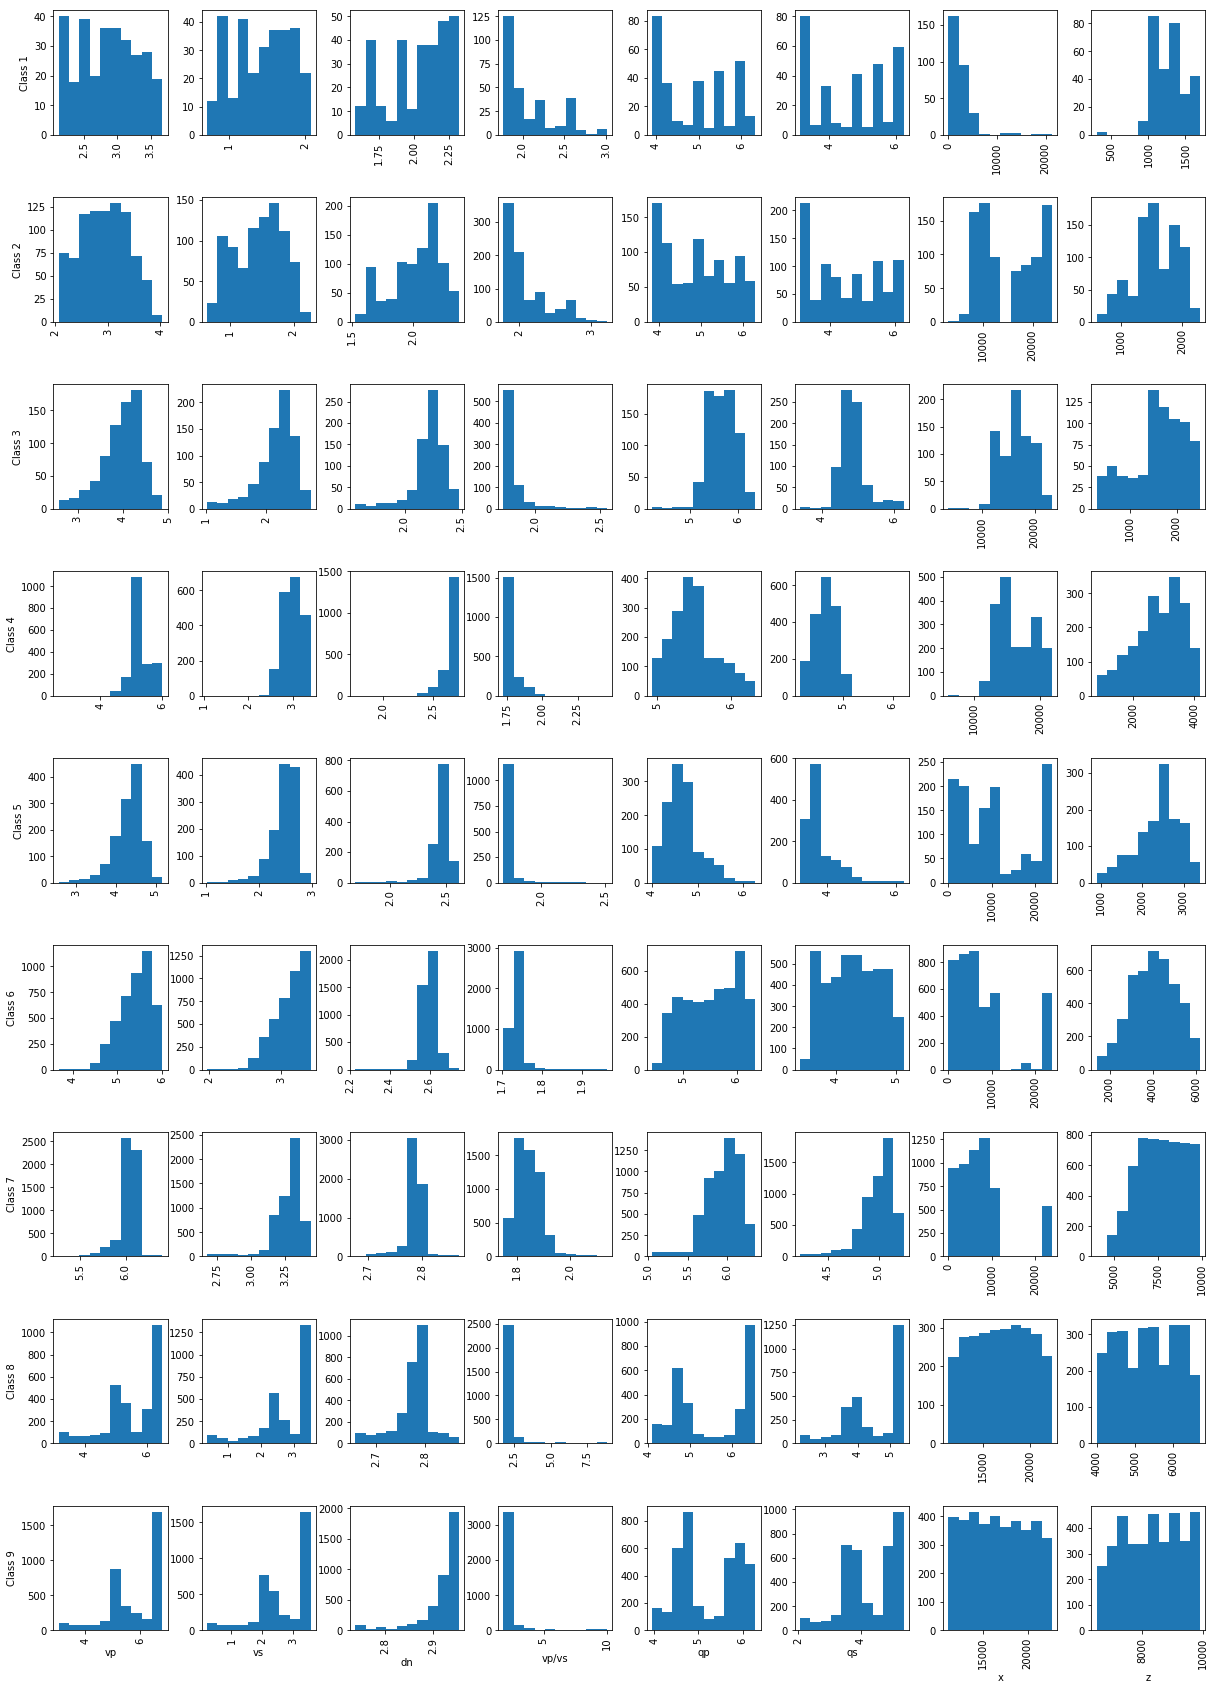

In [45]:
# plot the histogram - Data cleaned up
data_info2 = dp.plot_hist(data, np.reshape(label, (label.shape[0],1)), col_n)
data_info2

(21417, 8)
(21417,)


,vp,vs,dn,vp/vs,qp,qs,x,z,Class
count,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000
mean,5401.211656,2864.794516,2679.556560,1.992310,293.969642,112.731113,11919.573236,5482.695989,6.478825
std,961.089392,659.768501,234.086008,0.838130,156.922722,64.900133,6887.639754,2585.487456,1.964271
min,2062.773727,204.156374,1526.523872,1.703044,45.933951,7.830864,0.000000,300.000000,1.000000
25%,5032.373925,2547.931896,2595.497873,1.745731,140.089636,55.264698,5900.000000,3300.000000,6.000000
50%,5651.654297,3157.870627,2768.115681,1.820990,297.454341,115.487420,12100.000000,5500.000000,7.000000
75%,6064.342380,3331.161052,2792.356906,1.939927,418.052192,156.302750,17800.000000,7700.000000,8.000000
max,6813.368725,3565.957961,2953.318835,14.851561,705.338718,532.220882,23900.000000,9900.000000,9.000000


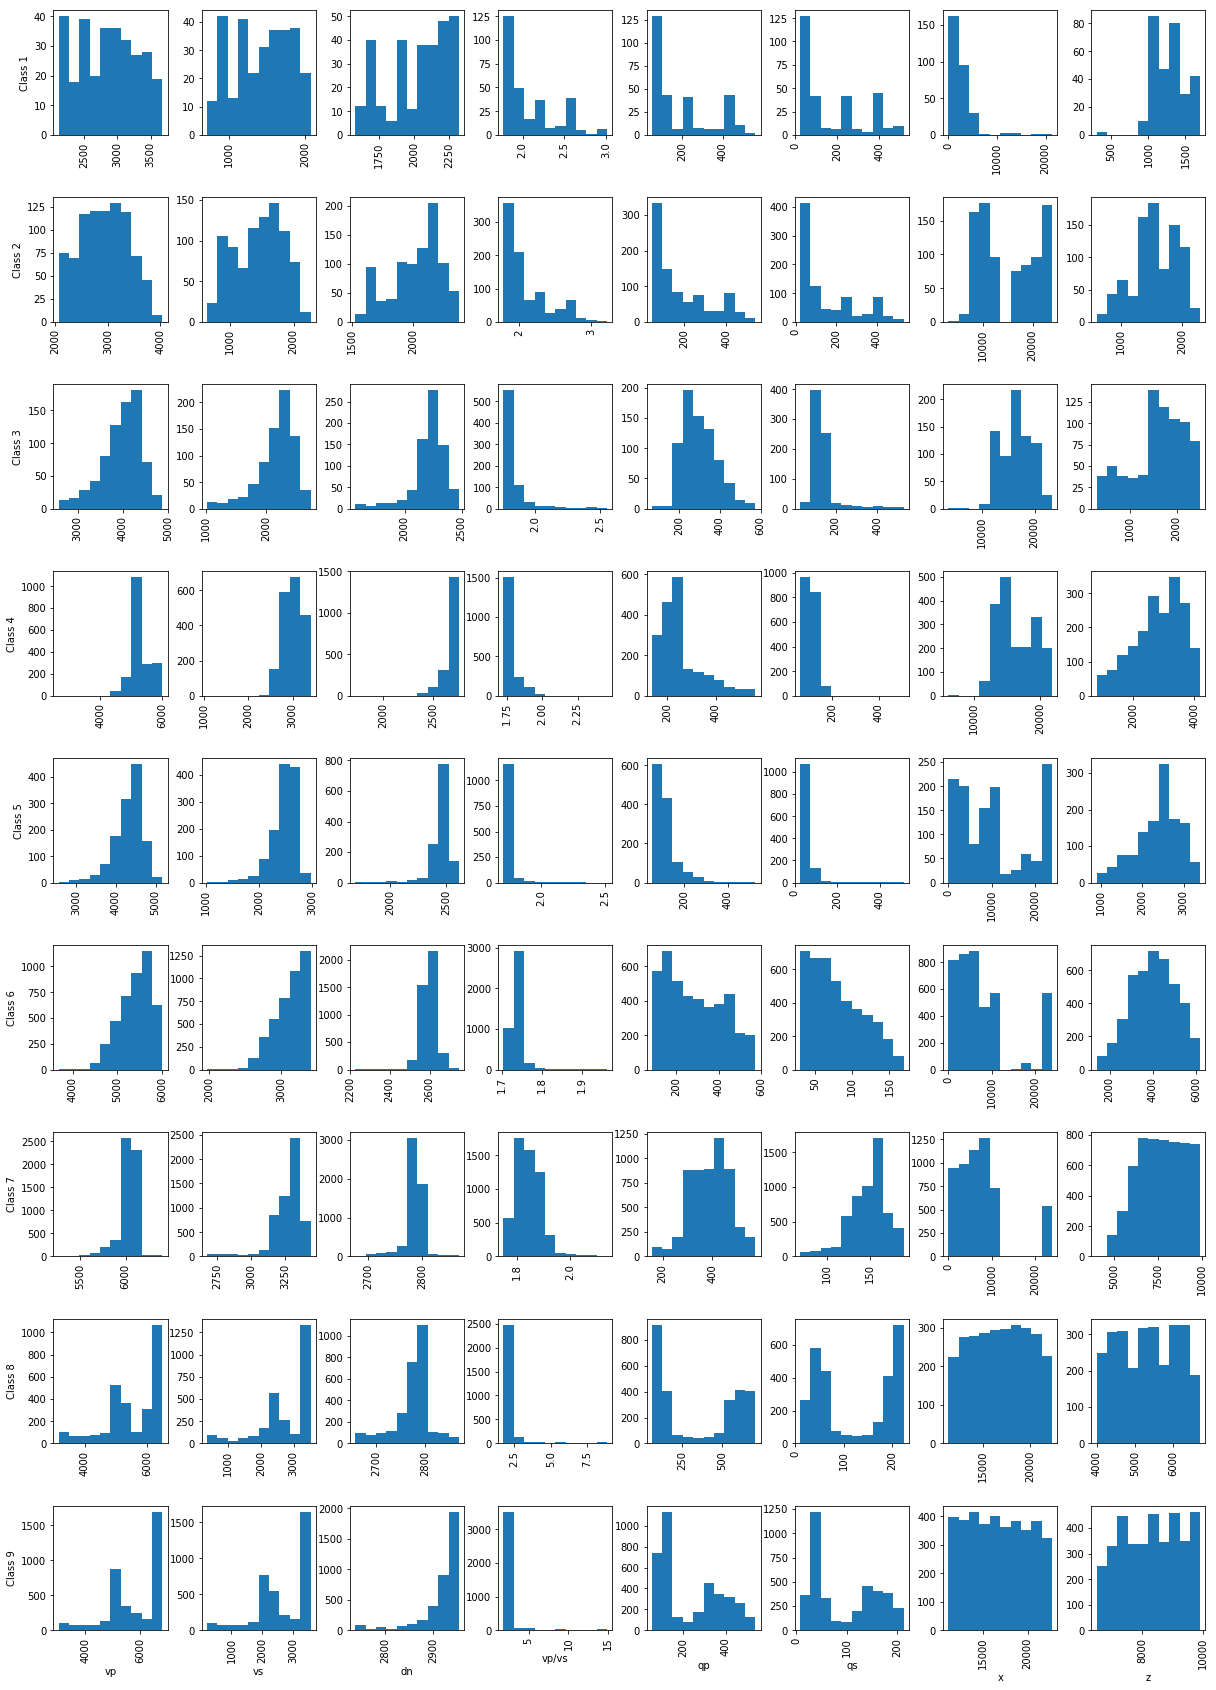

In [52]:
# plot the histogram - Data cleaned up
data_info = dp.plot_hist(idata, np.reshape(ilabel, (ilabel.shape[0],1)), col_n)
data_info

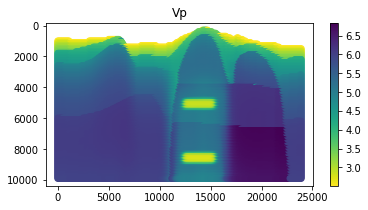

Plot saved at: data/M1_Vp.png


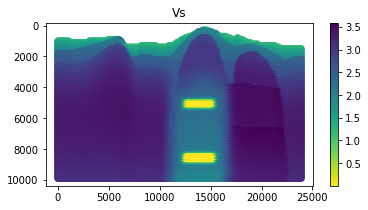

Plot saved at: data/M1_Vs.png


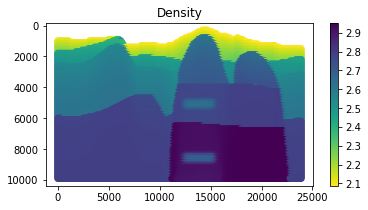

Plot saved at: data/M1_Density.png


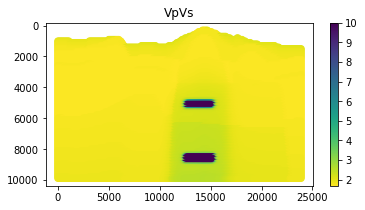

Plot saved at: data/M1_VpVs.png


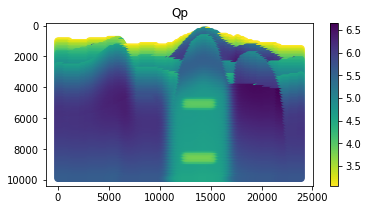

Plot saved at: data/M1_Qp.png


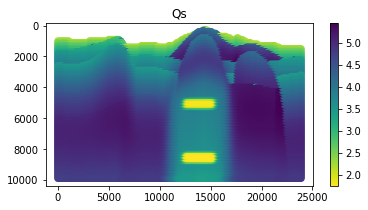

Plot saved at: data/M1_Qs.png


In [111]:
plot_fields(data[:,:-2], X, Z, titles=titles, model=model)

In [87]:
# from skimage.util import random_noise
# print(data.shape)

# data_noise = random_noise(data, mean=mean, var=std, mode='gaussian', seed=None)

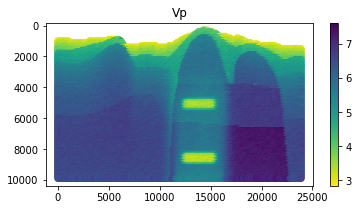

Plot saved at: data/M1_ns10_Vp.png


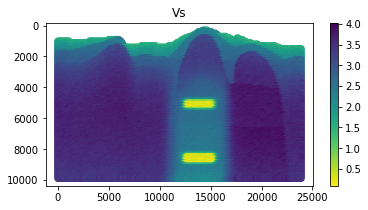

Plot saved at: data/M1_ns10_Vs.png


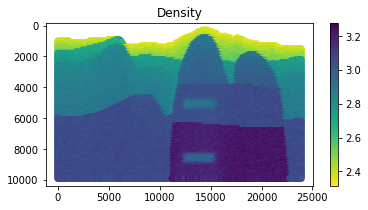

Plot saved at: data/M1_ns10_Density.png


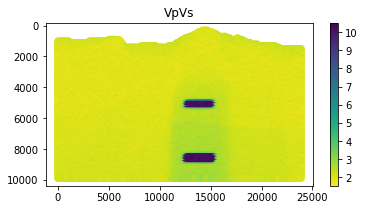

Plot saved at: data/M1_ns10_VpVs.png


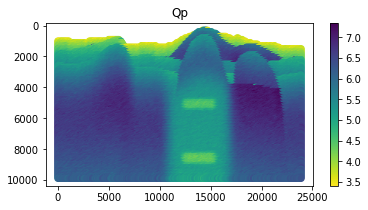

Plot saved at: data/M1_ns10_Qp.png


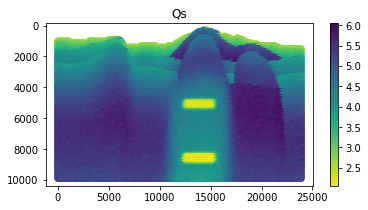

Plot saved at: data/M1_ns10_Qs.png


In [114]:
noisy_data = addNoise(data, 0.1)
plot_fields(noisy_data[:,:-2], X, Z, titles, model=model+'ns10_')

In [117]:
for sigma in range(6):
    print('sigma:', sigma)
    sm_ns_data = smoothing(noisy_data, sigma, model=model+'ns10_')
#     plot_fields(sm_ns_data[:,:-2], X, Z, titles=titles, model=model+'ns10_sm'+str(sigma)+'_')

sigma: 0
Smooth data saved at: data/M1_ns10_sm0_data.npy
sigma: 1
Smooth data saved at: data/M1_ns10_sm1_data.npy
sigma: 2
Smooth data saved at: data/M1_ns10_sm2_data.npy
sigma: 3
Smooth data saved at: data/M1_ns10_sm3_data.npy
sigma: 4
Smooth data saved at: data/M1_ns10_sm4_data.npy
sigma: 5
Smooth data saved at: data/M1_ns10_sm5_data.npy


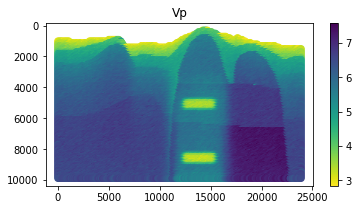

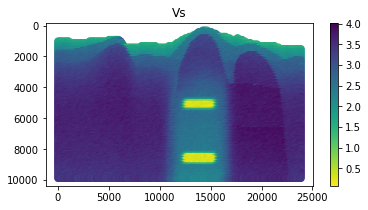

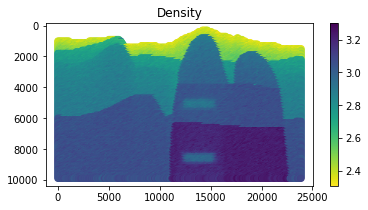

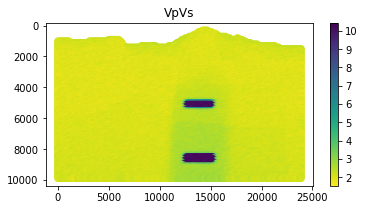

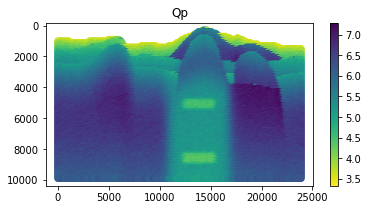

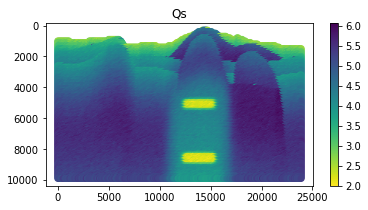

In [119]:
noisy_data = addNoise(data, 0.1)
plot_fields(noisy_data[:,:-2], X, Z, titles)

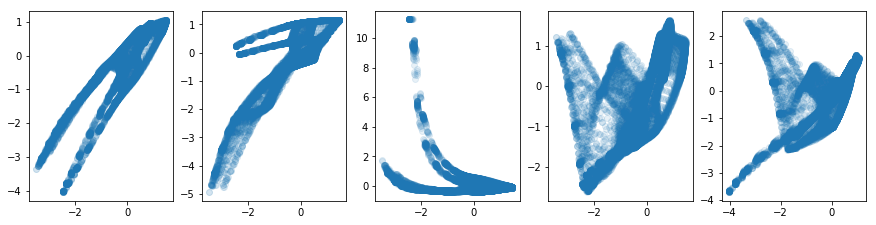

In [27]:
crossplot(norm_data)